In [148]:
import sys
!{sys.executable} -m pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [8]:
import plotly.graph_objects as go
import numpy as np
from scipy.signal import butter,filtfilt
import time
start_time = time.time()

# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

# sin wave
t=time 
#sig = np.sin(1.2*2*np.pi*t)
# Lets add some noise
#noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = G2Z-offset[3,2]
#sig + noise

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

start_time = time.time()
# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)
print("My program took", time.time() - start_time, "to run")

fig = go.Figure()
"""
fig.add_trace(go.Scatter(
            y = G2Z-offset[3,2],
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
"""
fig.add_trace(go.Scatter(
            y = data3D[:,3,2],
            line =  dict(shape =  'spline' ),
            name = 'signal with noise'
            ))
"""
fig.add_trace(go.Scatter(
            y = y,
            line =  dict(shape =  'spline' ),
            name = 'filtered signal'
            ))
"""
fig.show()


My program took 0.0020105838775634766 to run


[-0.2148291915655136, 9.530876159667969, 0.20824667811393738, 1.8025000095367432, 0.9449999928474426, 0.04374999925494194, -0.4529963731765747, -10.113128662109375, 0.1537913680076599, 3.403749942779541, 1.653749942779541, 2.309999942779541]
3 12
(3, 2, 12)


ValueError: x and y must have same first dimension, but have shapes (265,) and (12,)

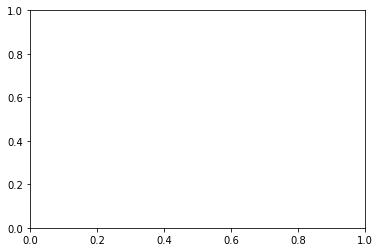

In [63]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun May 10 18:27:46 2020

@author: xnibereik
"""
import matplotlib.pyplot as plt
import csv
import numpy as np
import time
from scipy.signal import butter,filtfilt

# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 0.5      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

def running_average(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)  

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

tim = []
data = []
accel_data = []
gyro_data = []
no_sensors = 2
with open(r"readings.txt") as csv_file:
    csv_reader = csv.reader(csv_file, skipinitialspace=True)
    line_count = 0

    for row in csv_reader:
        if line_count == 0:
            pass
        else:
            row[0] = row[0].replace('(','')
            row[no_sensors*6] = row[no_sensors*6].replace(')','')
            row = [float(i) for i in row]
            tim.append(row[0])
            data.append(row[1:])
        line_count += 1
csv_file.close()

#reshape data np array of axis,sensors,data
#data3D = np.reshape();

'''
#accel1 reference
A1 = data3D[:,0,:]
A1X = data3D[:,0,0]
A1Y = data3D[:,0,1]
A1Z = data3D[:,0,2]

#accel2 reference
A2 = data3D[:,2,:]
A2X = data3D[:,2,0]
A2Y = data3D[:,2,1]
A2Z = data3D[:,2,2]

#gyro1 reference
G1 = data3D[:,1,:]
G1X = np.copy(data3D[:,1,0])
G1Y = data3D[:,1,1]
G1Z = data3D[:,1,2]

#gyro2 reference
G2 = data3D[:,3,:]
G2X = data3D[:,3,0]
G2Y = data3D[:,3,1]
G2Z = np.copy(data3D[:,3,2])
'''
tim = np.subtract(tim,tim[0])
#print(data3D)
def ave_filter(data3D):
    #time reference
    dim = np.shape(data3D)
    offset = np.zeros((dim[0],dim[1]))
    a_coeff = np.zeros(int(dim[1]/2))
    print(dim)
    #offsets & accelerometer scaling coefficients
    for axis in range(0,dim[0]):
        for sensor in range(0,dim[1]):
            offset[axis,sensor] = np.mean(data3D[axis,sensor,:])
            data3D[axis,sensor,:] -= offset[axis,sensor]
            data3D[axis,sensor,:] = np.concatenate((data3D[axis,sensor,0:9],running_average(data3D[axis,sensor,:],10)))
            data3D[axis,sensor,:]= butter_lowpass_filter(data3D[axis,sensor,:], cutoff, fs, order)
        if sensor%2 == 0:
            a_coeff[int(sensor/2)] = np.sqrt(np.sum(offset[:,sensor]**2))
            data3D[axis,sensor,:] /= a_coeff[int(sensor/2)]
    return data3D

data3D = ave_filter(data3D)

######sample of how to get a scaled acceleration########
#A1[:,0] = A1[:,0]/a_coeff[0]
#A1[:,1] = A1[:,1]/a_coeff[0]
#A1[:,2] = A1[:,2]/a_coeff[0]
######sample of how to get gyro and accel readings without offsets########
#G1[:,0] = G1[:,0]-offset[1,0]
#G1[:,1] = G1[:,1]-offset[1,1]
#G1[:,2] = G1[:,2]-offset[1,2]

plt.plot(tim,data3D[2,1,:],label='3d')
plt.legend()
